In [1]:
### Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree,ensemble
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv(r"C:\Users\FL_LPT-342\Desktop\Insofe\Data-Science-master\Data-Science-master\employee_data.csv")

In [4]:
data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


In [5]:
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [6]:
data.shape

(14249, 10)

In [7]:
data.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [8]:
data.department.unique() 

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [9]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [11]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(data)

,Data Type,No of Levels,Levels
avg_monthly_hrs,int64,249,[221 232 184 206 249 140 121 150 215 269 147 1...
department,object,12,['engineering' 'support' 'sales' 'IT' 'product...
filed_complaint,float64,1,[nan 1.]
last_evaluation,float64,12359,[0.93286764 nan 0.78882984 ... 0.847622...
n_projects,int64,7,[4 3 5 2 6 1 7]
recently_promoted,float64,1,[nan 1.]
salary,object,3,['low' 'medium' 'high']
satisfaction,float64,13710,[0.8298962 0.83454379 0.83498761 ... 0.898917...
status,object,2,['Left' 'Employed']
tenure,float64,8,[ 5. 2. 3. 4. 7. 6. nan 10. 8.]


In [12]:
#function for missing values in columns in data
def missing_coldata(df):
    missin_col = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,1),
                              columns=['% of missing value'])
    missin_col['Count of Missing Values'] = df.isnull().sum()
    return missin_col

In [13]:
missing_coldata(data)

,% of missing value,Count of Missing Values
recently_promoted,97.9,13949
filed_complaint,85.6,12191
last_evaluation,10.8,1532
department,5.0,709
satisfaction,1.3,181
tenure,1.3,181
avg_monthly_hrs,0.0,0
n_projects,0.0,0
salary,0.0,0
status,0.0,0


In [14]:
data['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: department, dtype: int64

In [15]:
#data['filed_complaint']=data['filed_complaint'].replace(np.NaN,0)

In [16]:
#data['recently_promoted']=data['recently_promoted'].replace(np.NaN,0)

In [17]:
data=data.drop(["filed_complaint","recently_promoted"],axis=1)

In [18]:
data['tenure']=data['tenure'].replace(np.NaN,0)

In [19]:
data['department']=data['department'].replace(np.NaN,'sales')

In [20]:
data['department'].value_counts()

sales                     4632
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: department, dtype: int64

In [21]:
cat_cols=["department","salary","n_projects","tenure","status"]
num_cols=["last_evaluation","satisfaction","avg_monthly_hrs"]

In [22]:
data[cat_cols] = data[cat_cols].apply(lambda x: x.astype('category'))
data[num_cols] = data[num_cols].apply(lambda x: x.astype('float'))
data.dtypes

avg_monthly_hrs     float64
department         category
last_evaluation     float64
n_projects         category
salary             category
satisfaction        float64
status             category
tenure             category
dtype: object

In [23]:
data.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221.0,engineering,0.932868,4,low,0.829896,Left,5.0
1,232.0,support,NaN,3,low,0.834544,Employed,2.0
2,184.0,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206.0,sales,0.575688,4,low,0.424764,Employed,2.0
4,249.0,sales,0.845217,3,low,0.779043,Employed,3.0


In [24]:
## Convert Categorical Columns to Dummies
cat_cols=["department","salary","n_projects","tenure","status"]
data = pd.get_dummies(data,columns=cat_cols,drop_first=True,)

In [25]:
data.isnull().sum()

avg_monthly_hrs                         0
last_evaluation                      1532
satisfaction                          181
department_admin                        0
department_engineering                  0
department_finance                      0
department_information_technology       0
department_management                   0
department_marketing                    0
department_procurement                  0
department_product                      0
department_sales                        0
department_support                      0
department_temp                         0
salary_low                              0
salary_medium                           0
n_projects_2                            0
n_projects_3                            0
n_projects_4                            0
n_projects_5                            0
n_projects_6                            0
n_projects_7                            0
tenure_2.0                              0
tenure_3.0                        

In [26]:
data.shape

(14249, 31)

In [27]:
data.head()



,avg_monthly_hrs,last_evaluation,satisfaction,department_admin,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,...,n_projects_7,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_10.0,status_Left
0,221.0,0.932868,0.829896,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,232.0,NaN,0.834544,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,184.0,0.788830,0.834988,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,206.0,0.575688,0.424764,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,249.0,0.845217,0.779043,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
data.columns

Index(['avg_monthly_hrs', 'last_evaluation', 'satisfaction',
       'department_admin', 'department_engineering', 'department_finance',
       'department_information_technology', 'department_management',
       'department_marketing', 'department_procurement', 'department_product',
       'department_sales', 'department_support', 'department_temp',
       'salary_low', 'salary_medium', 'n_projects_2', 'n_projects_3',
       'n_projects_4', 'n_projects_5', 'n_projects_6', 'n_projects_7',
       'tenure_2.0', 'tenure_3.0', 'tenure_4.0', 'tenure_5.0', 'tenure_6.0',
       'tenure_7.0', 'tenure_8.0', 'tenure_10.0', 'status_Left'],
      dtype='object')

In [29]:
## Split the data into X and y
X = data.copy().drop("status_Left",axis=1)
y = data["status_Left"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [31]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9974, 30)
(4275, 30)
(9974,)
(4275,)


In [32]:
X_test.isnull().sum()

avg_monthly_hrs                        0
last_evaluation                      487
satisfaction                          52
department_admin                       0
department_engineering                 0
department_finance                     0
department_information_technology      0
department_management                  0
department_marketing                   0
department_procurement                 0
department_product                     0
department_sales                       0
department_support                     0
department_temp                        0
salary_low                             0
salary_medium                          0
n_projects_2                           0
n_projects_3                           0
n_projects_4                           0
n_projects_5                           0
n_projects_6                           0
n_projects_7                           0
tenure_2.0                             0
tenure_3.0                             0
tenure_4.0      

In [33]:
X_train['satisfaction'].fillna(X_train['satisfaction'].mean(),inplace=True)

C:\Users\FL_LPT-342\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [34]:
X_train['last_evaluation'].fillna(X_train['last_evaluation'].mean(),inplace=True)

In [35]:
X_train.isnull().sum()

avg_monthly_hrs                      0
last_evaluation                      0
satisfaction                         0
department_admin                     0
department_engineering               0
department_finance                   0
department_information_technology    0
department_management                0
department_marketing                 0
department_procurement               0
department_product                   0
department_sales                     0
department_support                   0
department_temp                      0
salary_low                           0
salary_medium                        0
n_projects_2                         0
n_projects_3                         0
n_projects_4                         0
n_projects_5                         0
n_projects_6                         0
n_projects_7                         0
tenure_2.0                           0
tenure_3.0                           0
tenure_4.0                           0
tenure_5.0               

In [36]:
X_test.isnull().sum()

avg_monthly_hrs                        0
last_evaluation                      487
satisfaction                          52
department_admin                       0
department_engineering                 0
department_finance                     0
department_information_technology      0
department_management                  0
department_marketing                   0
department_procurement                 0
department_product                     0
department_sales                       0
department_support                     0
department_temp                        0
salary_low                             0
salary_medium                          0
n_projects_2                           0
n_projects_3                           0
n_projects_4                           0
n_projects_5                           0
n_projects_6                           0
n_projects_7                           0
tenure_2.0                             0
tenure_3.0                             0
tenure_4.0      

In [37]:
X_test['satisfaction'].fillna(X_train['satisfaction'].mean(),inplace=True)

In [38]:
X_test['last_evaluation'].fillna(X_train['last_evaluation'].mean(),inplace=True)

In [39]:
X_test.isnull().sum()

avg_monthly_hrs                      0
last_evaluation                      0
satisfaction                         0
department_admin                     0
department_engineering               0
department_finance                   0
department_information_technology    0
department_management                0
department_marketing                 0
department_procurement               0
department_product                   0
department_sales                     0
department_support                   0
department_temp                      0
salary_low                           0
salary_medium                        0
n_projects_2                         0
n_projects_3                         0
n_projects_4                         0
n_projects_5                         0
n_projects_6                         0
n_projects_7                         0
tenure_2.0                           0
tenure_3.0                           0
tenure_4.0                           0
tenure_5.0               

In [40]:
X_train.head()

,avg_monthly_hrs,last_evaluation,satisfaction,department_admin,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,...,n_projects_6,n_projects_7,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_10.0
9136,251.0,0.558823,0.918819,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13910,248.0,0.776864,0.911490,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10989,214.0,0.779534,0.806227,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12024,135.0,0.553325,0.358750,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12806,239.0,0.844733,0.862607,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
X_test.head()

,avg_monthly_hrs,last_evaluation,satisfaction,department_admin,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,...,n_projects_6,n_projects_7,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_10.0
7880,145.0,0.505744,0.416374,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10345,250.0,0.894886,0.110207,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3504,238.0,0.851479,0.792193,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6528,170.0,0.843560,0.522508,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6727,272.0,0.866733,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train.iloc[:,:3])

X_train.iloc[:,:3]=scaler.transform(X_train.iloc[:,:3])
X_test.iloc[:,:3]=scaler.transform(X_test.iloc[:,:3])

C:\Users\FL_LPT-342\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\FL_LPT-342\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [43]:
X_train.head()

,avg_monthly_hrs,last_evaluation,satisfaction,department_admin,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,...,n_projects_6,n_projects_7,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_10.0
9136,0.997060,-0.973706,1.196749,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13910,0.938420,0.357912,1.167210,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10989,0.273829,0.374220,0.742923,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12024,-1.270366,-1.007288,-1.060737,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12806,0.762499,0.772406,0.970174,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
X_test.head()

,avg_monthly_hrs,last_evaluation,satisfaction,department_admin,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,...,n_projects_6,n_projects_7,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_10.0
7880,-1.074898,-1.297874,-0.828470,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10345,0.977513,1.078702,-2.062545,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3504,0.742952,0.813606,0.686355,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6528,-0.586229,0.765244,-0.400672,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6727,1.407542,0.906766,1.523968,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
######logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [47]:
lrc = LogisticRegression()

lrc.fit(X_train,y_train)

y_pred_train_lrc = lrc.predict(X_train)
y_pred_test_lrc = lrc.predict(X_test)

C:\Users\FL_LPT-342\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

#logistic_model = LogisticRegression(class_weight='balanced')
#logistic_model.fit(x_train,y_train)
#trainy_pred = logistic_model.predict(x_train)
#testy_pred = logistic_model.predict(x_validation)
print(classification_report(y_train,y_pred_train_lrc))
print(classification_report(y_test,y_pred_test_lrc))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7612
           1       0.77      0.82      0.79      2362

    accuracy                           0.90      9974
   macro avg       0.86      0.87      0.86      9974
weighted avg       0.90      0.90      0.90      9974

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3245
           1       0.79      0.82      0.80      1030

    accuracy                           0.90      4275
   macro avg       0.87      0.87      0.87      4275
weighted avg       0.90      0.90      0.90      4275



In [49]:
print('Accuracy of lrc classofier on a test set: {:.2f}'.format(lrc.score(X_test,y_test)))

Accuracy of lrc classofier on a test set: 0.90


In [50]:
print('Accuracy of lrc classofier on a train set: {:.2f}'.format(lrc.score(X_train,y_train)))

Accuracy of lrc classofier on a train set: 0.90


In [52]:
!pip install metrics

  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17814 sha256=dca1c18dc1e47e90b58bb903f346260e1cf0ededb037c49fafa49f1dc81d0f03
  Stored in directory: c:\users\fl_lpt-342\appdata\local\pip\cache\wheels\4f\55\f5\ca7e08a3ac083b918070e9d148ecafba8172b24611712ad678
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24228 sha256=c30bb99034d5edb66b856f40c1e01ab161c93867e3d49077c4af158a8bfb694c
  Stored in directory: c:\users\fl_lpt-342\appdata\local\pip\cache\wheels\7c\bb\0d\525cedbe683d79ee6c9185fb7e3c27d30a43141ecf89ccb46b
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.8.1
    Uninstalling Pygments-2.8.1:
      Successfully uninstalled Pygments-2.8.1
  Attempting uninstall: pathspec
    Found existing installation: pathspec 0.7.0
    Uninstalling pathspec-0.7.0:
      Successfully uninstalled pathspec-0.7.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
nbconvert 6.0.7 requires pygments>=2.4.1, but you have pygments 2.2.0 which is incompatible.
jupyterlab-pygments 0.1.2 requires pygments<3,>=2.4.1, but you have pygments 2.2.0 which is incompatible.
black 19.10b0 requires pathspec<1,>=0.6, but you have pathspec 0.5.5 which is incompatible.


In [53]:
ytprobs = lrc.predict_proba(X_train)
preds = ytprobs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred_train_lrc)
roc_auc = metrics.auc(fpr, tpr)

ytprobs1 = lrc.predict_proba(X_test)
preds1 = ytprobs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_test_lrc)
roc_auc1 = metrics.auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'r', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'metrics' is not defined

C:\Users\FL_LPT-342\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\FL_LPT-342\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\FL_LPT-342\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\FL_LPT-342\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

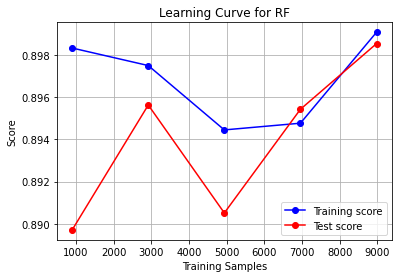

In [54]:
from sklearn.model_selection import learning_curve
train_size, train_score, test_score = learning_curve(estimator=lrc, X=X_train, y=y_train, cv=10 )

train_score_m = np.mean(train_score, axis=1)
test_score_m = np.mean(test_score, axis=1)

plt.plot(train_size, train_score_m, 'o-', color="b")
plt.plot(train_size, test_score_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curve for RF")
plt.grid()

plt.show()

In [55]:
X_train.columns

Index(['avg_monthly_hrs', 'last_evaluation', 'satisfaction',
       'department_admin', 'department_engineering', 'department_finance',
       'department_information_technology', 'department_management',
       'department_marketing', 'department_procurement', 'department_product',
       'department_sales', 'department_support', 'department_temp',
       'salary_low', 'salary_medium', 'n_projects_2', 'n_projects_3',
       'n_projects_4', 'n_projects_5', 'n_projects_6', 'n_projects_7',
       'tenure_2.0', 'tenure_3.0', 'tenure_4.0', 'tenure_5.0', 'tenure_6.0',
       'tenure_7.0', 'tenure_8.0', 'tenure_10.0'],
      dtype='object')

In [56]:
sns.lmplot(x='avg_monthly_hrs',y='',data=X_train)

KeyError: "[''] not in index"

In [57]:
#####decision tree

In [58]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)

In [59]:

print(classification_report(y_train,y_pred_train_dtc))
print(classification_report(y_test,y_pred_test_dtc))

pred_rfc_train=accuracy_score(y_train, y_pred_train_dtc)
pred_rfc_test=accuracy_score(y_test, y_pred_test_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7612
           1       1.00      1.00      1.00      2362

    accuracy                           1.00      9974
   macro avg       1.00      1.00      1.00      9974
weighted avg       1.00      1.00      1.00      9974

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3245
           1       0.90      0.93      0.92      1030

    accuracy                           0.96      4275
   macro avg       0.94      0.95      0.94      4275
weighted avg       0.96      0.96      0.96      4275



In [60]:
######svc

In [61]:
svc = SVC()

svc.fit(X_train,y_train)

y_pred_train_svc = svc.predict(X_train)
y_pred_test_svc = svc.predict(X_test)

In [62]:

print(classification_report(y_train,y_pred_train_svc))
print(classification_report(y_test,y_pred_test_svc))

pred_rfc_train=accuracy_score(y_train, y_pred_train_svc)
pred_rfc_test=accuracy_score(y_test, y_pred_test_svc)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7612
           1       0.95      0.91      0.93      2362

    accuracy                           0.97      9974
   macro avg       0.96      0.95      0.96      9974
weighted avg       0.97      0.97      0.97      9974

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3245
           1       0.94      0.90      0.92      1030

    accuracy                           0.96      4275
   macro avg       0.95      0.94      0.94      4275
weighted avg       0.96      0.96      0.96      4275



In [63]:
######random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X = X_train,y = y_train)

RandomForestClassifier()

In [65]:
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score,f1_score
print("\nTrain accuracy",accuracy_score(y_train,train_predictions))
#print("\nTrain f1-score for class '0'",f1_score(y_train,train_predictions,pos_label="0"))
#print("\nTrain f1-score for class '1'",f1_score(y_train,train_predictions,pos_label="1"))


Train accuracy 0.9995989572889513


In [67]:
print("\nTest accuracy",accuracy_score(y_test,test_predictions))
#print("\nTest f1-score for class '1'",f1_score(y_test,test_predictions,pos_label="1"))
#print("\nTest f1-score for class '0'",f1_score(y_test,test_predictions,pos_label="0"))


Test accuracy 0.9775438596491228


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_predictions)

array([[3222,   23],
       [  73,  957]], dtype=int64)

In [69]:

print(classification_report(y_train,train_predictions))
print(classification_report(y_test,test_predictions))

pred_rfc_train=accuracy_score(y_train, train_predictions)
pred_rfc_test=accuracy_score(y_test, test_predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7612
           1       1.00      1.00      1.00      2362

    accuracy                           1.00      9974
   macro avg       1.00      1.00      1.00      9974
weighted avg       1.00      1.00      1.00      9974

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3245
           1       0.98      0.93      0.95      1030

    accuracy                           0.98      4275
   macro avg       0.98      0.96      0.97      4275
weighted avg       0.98      0.98      0.98      4275



In [70]:
#########knn

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [72]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="brute")
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3, weights='distance')

In [73]:
pred_train = knn_classifier.predict(X_train) 
pred_test = knn_classifier.predict(X_test)

In [74]:
cm_test = confusion_matrix(y_pred=pred_test, y_true=y_test)

print(cm_test)

[[3139  106]
 [  59  971]]


In [75]:
# Accuracy: 

sum(np.diag(cm_test))/np.sum(cm_test)

# np.trace(cm_test)/np.sum(cm_test)

0.9614035087719298

In [76]:
print("Accuracy on train is:",accuracy_score(y_train,pred_train))
print("Accuracy on test is:",accuracy_score(y_test,pred_test))

Accuracy on train is: 0.9995989572889513
Accuracy on test is: 0.9614035087719298


In [77]:
######adaboost

In [78]:
ABclassifier = ensemble.AdaBoostClassifier()
ABclassifier.fit(X_train,y_train)
AB_train_preds=ABclassifier.predict(X_train)
AB_test_preds = ABclassifier.predict(X_test)
print("train_confusion Matrix")
print(confusion_matrix(y_train,AB_train_preds))
print("test_confusion Matrix")
print(confusion_matrix(y_test,AB_test_preds))
print("Classification Report")
print(classification_report(y_test,AB_test_preds))
print("Classification Report")
print(classification_report(y_train,AB_train_preds))

train_confusion Matrix
[[7296  316]
 [ 405 1957]]
test_confusion Matrix
[[3129  116]
 [ 190  840]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3245
           1       0.88      0.82      0.85      1030

    accuracy                           0.93      4275
   macro avg       0.91      0.89      0.90      4275
weighted avg       0.93      0.93      0.93      4275

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7612
           1       0.86      0.83      0.84      2362

    accuracy                           0.93      9974
   macro avg       0.90      0.89      0.90      9974
weighted avg       0.93      0.93      0.93      9974



In [79]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,AB_train_preds))
print(accuracy_score(y_test,AB_test_preds))

0.927712051333467
0.9284210526315789


In [80]:
###########xgboost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier()
X_classifier.fit(X_train,y_train)

In [ ]:
xgboost_train_preds=X_classifier.predict(X_train)
xgboost_test_preds=X_classifier.predict(X_test)                     

In [ ]:
print('Train Accuracy =',X_classifier.score(X_train, xgboost_train_preds))
print('Test Accuracy =',X_classifier.score(X_test, xgboost_test_preds))

In [ ]:
print("Train - Confusion Matrix")
print(confusion_matrix(y_train,X_classifier.predict(X_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,X_classifier.predict(X_test)))

In [ ]:
print("Classification Report")
print(classification_report(y_test,xgboost_test_preds))
print("Classification Report")
print(classification_report(y_train,xgboost_train_preds))

In [ ]:
######navie bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
nb_pred_test = gaussian.predict(X_test)
nb_pred_train = gaussian.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,nb_pred_train))
print(accuracy_score(y_test,nb_pred_test))
#acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
#acc_gaussian
#print(accuracy_score(y_test,nb))